#Data Preprocessing

##uploading dataset

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
placement= pd.read_csv('/content/datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [211]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


##understanding dataset

In [212]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [213]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Text(0, 0.5, 'salary')

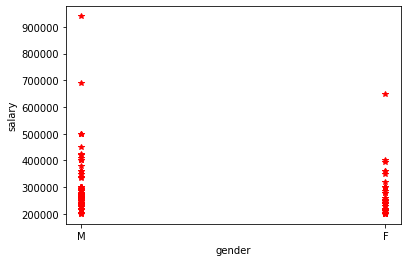

In [214]:
plt.plot(placement['gender'], placement['salary'],'r*')
plt.xlabel('gender')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

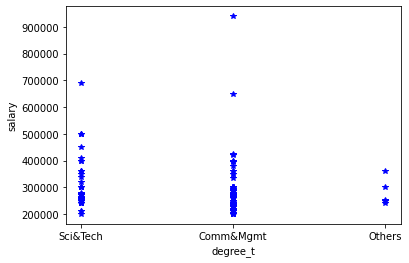

In [215]:
plt.plot(placement['degree_t'], placement['salary'],'b*')
plt.xlabel('degree_t')
plt.ylabel('salary')

In [216]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [217]:
print(placement['status'].unique()) 

['Placed' 'Not Placed']


#Separate Features and Target
* Here we are considering 'status' as target

* and rest of the columns as features

In [218]:
import numpy as np

In [219]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [220]:
x = placement.drop(['status','salary'],axis=1)
y = placement.iloc[:,-2]


here axis=1 removes the coulmn where axis =0 drops and row

In [221]:
x

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [222]:
y

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

numpy is used to convert to an array ,where numpy contains list of array only

In [223]:
y = y.to_numpy()
print(y)

['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed' 'Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Plac

In [224]:
x = x.to_numpy()
print(x)

[[1 'M' 67.0 ... 55.0 'Mkt&HR' 58.8]
 [2 'M' 79.33 ... 86.5 'Mkt&Fin' 66.28]
 [3 'M' 65.0 ... 75.0 'Mkt&Fin' 57.8]
 ...
 [213 'M' 67.0 ... 59.0 'Mkt&Fin' 69.72]
 [214 'F' 74.0 ... 70.0 'Mkt&HR' 60.23]
 [215 'M' 62.0 ... 89.0 'Mkt&HR' 60.22]]


In [225]:
x = placement.drop(['status','salary'],axis=1).values
y = placement.iloc[:,-2].values
print(x)
print(y)

[[1 'M' 67.0 ... 55.0 'Mkt&HR' 58.8]
 [2 'M' 79.33 ... 86.5 'Mkt&Fin' 66.28]
 [3 'M' 65.0 ... 75.0 'Mkt&Fin' 57.8]
 ...
 [213 'M' 67.0 ... 59.0 'Mkt&Fin' 69.72]
 [214 'F' 74.0 ... 70.0 'Mkt&HR' 60.23]
 [215 'M' 62.0 ... 89.0 'Mkt&HR' 60.22]]
['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed' 'Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Place

#Encoding Textual Information


* One Hot Encoder ( independent features )
* Label Encoder ( dependent features )

##One Hot Encoder

* For features
* Converts categorical data into numeric data for better understanding.

In [226]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [227]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')


In [228]:
x = np.array(ct.fit_transform(x))


In [229]:

x

array([[0.0, 1.0, 1, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 1.0, 2, ..., 86.5, 'Mkt&Fin', 66.28],
       [0.0, 1.0, 3, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 213, ..., 59.0, 'Mkt&Fin', 69.72],
       [1.0, 0.0, 214, ..., 70.0, 'Mkt&HR', 60.23],
       [0.0, 1.0, 215, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [230]:

temp= pd.DataFrame(data=x)

In [231]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,1,67,Others,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8
1,0,1,2,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,0,1,3,65,Central,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8
3,0,1,4,56,Central,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59.43
4,0,1,5,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,211,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49
211,0,1,212,58,Others,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62
212,0,1,213,67,Others,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72
213,1,0,214,74,Others,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23


In [232]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')

In [233]:
x = np.array(ct.fit_transform(x))


In [234]:
x

array([[0.0, 1.0, 0.0, ..., 55.0, 'Mkt&HR', 58.8],
       [1.0, 0.0, 0.0, ..., 86.5, 'Mkt&Fin', 66.28],
       [1.0, 0.0, 0.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 0.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [0.0, 1.0, 1.0, ..., 70.0, 'Mkt&HR', 60.23],
       [1.0, 0.0, 0.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [235]:
temp= pd.DataFrame(data=x)


In [236]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,1,0,1,1,67,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8
1,1,0,0,1,2,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,1,0,0,1,3,65,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8
3,1,0,0,1,4,56,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59.43
4,1,0,0,1,5,85.8,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,211,80.6,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49
211,0,1,0,1,212,58,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62
212,0,1,0,1,213,67,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72
213,0,1,1,0,214,74,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23


In [237]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')

In [238]:
x = np.array(ct.fit_transform(x))

In [239]:
x

array([[0.0, 1.0, 0.0, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 1.0, 1.0, ..., 86.5, 'Mkt&Fin', 66.28],
       [1.0, 0.0, 1.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 0.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [0.0, 1.0, 0.0, ..., 70.0, 'Mkt&HR', 60.23],
       [0.0, 1.0, 1.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [240]:
temp= pd.DataFrame(data=x)

In [241]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,0,1,0,1,1,67,91,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8
1,0,1,1,0,0,1,2,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,1,0,1,0,0,1,3,65,68,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8
3,1,0,1,0,0,1,4,56,52,Science,52,Sci&Tech,No,66,Mkt&HR,59.43
4,1,0,1,0,0,1,5,85.8,73.6,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,1,211,80.6,82,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49
211,0,1,0,1,0,1,212,58,60,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62
212,0,1,0,1,0,1,213,67,67,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72
213,0,1,0,1,1,0,214,74,66,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23


In [242]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')

In [243]:
x = np.array(ct.fit_transform(x))

In [244]:
x

array([[0.0, 1.0, 0.0, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 0.0, 1.0, ..., 86.5, 'Mkt&Fin', 66.28],
       [1.0, 0.0, 0.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 0.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [0.0, 1.0, 0.0, ..., 70.0, 'Mkt&HR', 60.23],
       [0.0, 0.0, 1.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [245]:
temp= pd.DataFrame(data=x)

In [246]:

temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,1,0,0,1,0,1,0,1,1,67,91,58,Sci&Tech,No,55,Mkt&HR,58.8
1,0,0,1,0,1,1,0,0,1,2,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,1,0,0,1,0,1,0,0,1,3,65,68,64,Comm&Mgmt,No,75,Mkt&Fin,57.8
3,0,0,1,1,0,1,0,0,1,4,56,52,52,Sci&Tech,No,66,Mkt&HR,59.43
4,0,1,0,1,0,1,0,0,1,5,85.8,73.6,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,0,1,0,1,0,1,211,80.6,82,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49
211,0,0,1,0,1,0,1,0,1,212,58,60,72,Sci&Tech,No,74,Mkt&Fin,53.62
212,0,1,0,0,1,0,1,0,1,213,67,67,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72
213,0,1,0,0,1,0,1,1,0,214,74,66,58,Comm&Mgmt,No,70,Mkt&HR,60.23


In [247]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')

In [248]:
x = np.array(ct.fit_transform(x))

In [249]:
x

array([[0.0, 0.0, 1.0, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 0.0, 1.0, ..., 86.5, 'Mkt&Fin', 66.28],
       [1.0, 0.0, 0.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [1.0, 0.0, 0.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [1.0, 0.0, 0.0, ..., 70.0, 'Mkt&HR', 60.23],
       [1.0, 0.0, 0.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [250]:
temp= pd.DataFrame(data=x)

In [251]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,1,0,0,1,0,1,0,1,1,67,91,58,No,55,Mkt&HR,58.8
1,0,0,1,0,0,1,0,1,1,0,0,1,2,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28
2,1,0,0,1,0,0,1,0,1,0,0,1,3,65,68,64,No,75,Mkt&Fin,57.8
3,0,0,1,0,0,1,1,0,1,0,0,1,4,56,52,52,No,66,Mkt&HR,59.43
4,1,0,0,0,1,0,1,0,1,0,0,1,5,85.8,73.6,73.3,No,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,1,0,0,1,0,1,0,1,211,80.6,82,77.6,No,91,Mkt&Fin,74.49
211,0,0,1,0,0,1,0,1,0,1,0,1,212,58,60,72,No,74,Mkt&Fin,53.62
212,1,0,0,0,1,0,0,1,0,1,0,1,213,67,67,73,Yes,59,Mkt&Fin,69.72
213,1,0,0,0,1,0,0,1,0,1,1,0,214,74,66,58,No,70,Mkt&HR,60.23


In [252]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [16])], remainder='passthrough')

In [253]:
x = np.array(ct.fit_transform(x))

In [254]:
x

array([[1.0, 0.0, 0.0, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 1.0, 0.0, ..., 86.5, 'Mkt&Fin', 66.28],
       [1.0, 0.0, 1.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 1.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [1.0, 0.0, 1.0, ..., 70.0, 'Mkt&HR', 60.23],
       [1.0, 0.0, 1.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [255]:
temp= pd.DataFrame(data=x)

In [256]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,67,91,58,55,Mkt&HR,58.8
1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,2,79.33,78.33,77.48,86.5,Mkt&Fin,66.28
2,1,0,1,0,0,1,0,0,1,0,1,0,0,1,3,65,68,64,75,Mkt&Fin,57.8
3,1,0,0,0,1,0,0,1,1,0,1,0,0,1,4,56,52,52,66,Mkt&HR,59.43
4,1,0,1,0,0,0,1,0,1,0,1,0,0,1,5,85.8,73.6,73.3,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,1,0,0,0,1,0,0,1,0,1,0,1,211,80.6,82,77.6,91,Mkt&Fin,74.49
211,1,0,0,0,1,0,0,1,0,1,0,1,0,1,212,58,60,72,74,Mkt&Fin,53.62
212,0,1,1,0,0,0,1,0,0,1,0,1,0,1,213,67,67,73,59,Mkt&Fin,69.72
213,1,0,1,0,0,0,1,0,0,1,0,1,1,0,214,74,66,58,70,Mkt&HR,60.23


In [257]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [19])], remainder='passthrough')

In [258]:
x = np.array(ct.fit_transform(x))

In [259]:

x

array([[0.0, 1.0, 1.0, ..., 58.0, 55.0, 58.8],
       [1.0, 0.0, 0.0, ..., 77.48, 86.5, 66.28],
       [1.0, 0.0, 1.0, ..., 64.0, 75.0, 57.8],
       ...,
       [1.0, 0.0, 0.0, ..., 73.0, 59.0, 69.72],
       [0.0, 1.0, 1.0, ..., 58.0, 70.0, 60.23],
       [0.0, 1.0, 1.0, ..., 53.0, 89.0, 60.22]], dtype=object)

In [260]:
temp= pd.DataFrame(data=x)

In [261]:

temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,67,91,58,55,58.8
1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,2,79.33,78.33,77.48,86.5,66.28
2,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,3,65,68,64,75,57.8
3,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,4,56,52,52,66,59.43
4,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,5,85.8,73.6,73.3,96.8,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,211,80.6,82,77.6,91,74.49
211,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,212,58,60,72,74,53.62
212,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,213,67,67,73,59,69.72
213,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,214,74,66,58,70,60.23


#Splitting into Test and Train sets

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [264]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

182
33
182
33


In [265]:
x_train

array([[0.0, 1.0, 0.0, ..., 73.0, 85.0, 65.83],
       [1.0, 0.0, 1.0, ..., 70.67, 89.0, 60.39],
       [1.0, 0.0, 1.0, ..., 64.0, 53.88, 54.97],
       ...,
       [1.0, 0.0, 1.0, ..., 60.0, 84.0, 64.15],
       [0.0, 1.0, 1.0, ..., 65.6, 68.0, 71.63],
       [1.0, 0.0, 0.0, ..., 73.0, 59.0, 69.72]], dtype=object)

In [266]:
y_train

array(['Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Pl

In [267]:
x_test

array([[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0.0, 1.0, 21, 62.0, 65.0, 66.0, 50.0, 56.7],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
        0.0, 1.0, 0.0, 55, 74.0, 60.0, 69.0, 78.0, 65.56],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
        0.0, 0.0, 1.0, 56, 60.4, 66.6, 65.0, 71.0, 52.71],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 1.0, 0.0, 169, 48.0, 51.0, 58.0, 60.0, 58.79],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0.0, 1.0, 204, 55.68, 61.33, 56.87, 66.0, 58.3],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
        0.0, 0.0, 1.0, 85, 70.0, 63.0, 70.0, 55.0, 62.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0.0, 1.0, 1, 67.0, 91.0, 58.0, 55.0, 58.8],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
   

In [268]:
y_test

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed'], dtype=object)

##Label Encoder
* For target
* 
In this it converts status labels to numeric form

In [269]:
from sklearn.preprocessing import LabelEncoder

In [270]:
le = LabelEncoder()

In [271]:
 lab1= le.fit_transform(y_train)

In [272]:
lab1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1])

In [273]:
y_train

array(['Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Pl

In [274]:
lab2 = le.fit_transform(y_test)

In [275]:
lab2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [276]:
y_test

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed'], dtype=object)

#Standardisation
gives more accuracy

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
sc = StandardScaler()

In [279]:
xn_train=sc.fit_transform(x_train)
xn_test=sc.transform(x_test)

#Train on different algorithms
We totally trained on 5 algorithms


* LogisticRegression class we have used linear_model library
* KNeighborsClassifier class we have used neighbors library
* DecisionTreeClassifier class we have used tree library
* RandomForestClassifier class we have used ensemble library
* SVC class we have used svm library

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [281]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier()
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel='rbf')

In [282]:
l_cla.fit(xn_train, lab1)
k_cla.fit(xn_train, lab1)
d_cla.fit(xn_train, lab1)
r_cla.fit(xn_train, lab1)
s_cla.fit(xn_train, lab1)
ks_cla.fit(xn_train, lab1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [283]:
l_pred = l_cla.predict(xn_test)
k_pred = k_cla.predict(xn_test)
d_pred = d_cla.predict(xn_test)
r_pred = r_cla.predict(xn_test)
s_pred = s_cla.predict(xn_test)
ks_pred = ks_cla.predict(xn_test)

In [284]:
from sklearn.metrics import confusion_matrix

In [285]:

l_c = confusion_matrix(lab2, l_pred)


In [286]:
l_c

array([[ 8,  1],
       [ 1, 23]])

In [287]:
k_c = confusion_matrix(lab2, k_pred)

In [288]:
k_c

array([[ 5,  4],
       [ 0, 24]])

In [289]:
d_c = confusion_matrix(lab2, d_pred)


In [290]:
d_c

array([[ 8,  1],
       [ 7, 17]])

In [291]:

r_c = confusion_matrix(lab2, r_pred)

In [292]:
r_c

array([[ 7,  2],
       [ 3, 21]])

In [293]:
s_c = confusion_matrix(lab2, s_pred)

In [294]:
s_c

array([[ 8,  1],
       [ 1, 23]])

In [295]:
ks_c = confusion_matrix(lab2, ks_pred)

In [296]:
ks_c

array([[ 7,  2],
       [ 1, 23]])

#Result

In [297]:
from sklearn.metrics import accuracy_score

In [298]:
l_a = accuracy_score(lab2, l_pred)

In [299]:
print('\nLogistic Regression: ' + str(l_a))


Logistic Regression: 0.9393939393939394


In [300]:
k_a = accuracy_score(lab2, k_pred)

In [301]:
print('\nKNN: ' + str(k_a) )


KNN: 0.8787878787878788


In [302]:
d_a = accuracy_score(lab2, d_pred)

In [303]:
print('\nDecision Tree: ' + str(d_a))


Decision Tree: 0.7575757575757576


In [304]:
r_a = accuracy_score(lab2, r_pred)

In [305]:
print('\nRandom Forest: ' + str(r_a))


Random Forest: 0.8484848484848485


In [306]:
s_a = accuracy_score(lab2, s_pred)

In [307]:
print('\nLinear SVC: ' + str(s_a))


Linear SVC: 0.9393939393939394


In [308]:
ks_a = accuracy_score(lab2, ks_pred)

In [309]:
print('\nKernel SVC: ' + str(ks_a))


Kernel SVC: 0.9090909090909091


#Conclusion
done by using Classification
